In [2]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

ImportError: the 'read_file' function requires the 'fiona' package, but it is not installed or does not import correctly.
Importing fiona resulted in: No module named 'fiona'

In [ ]:
# what is it?
type(countries)

In [ ]:
# dimensions
countries.shape

In [ ]:
# names
countries.columns

In [ ]:
# some content
countries.head()

In [ ]:
# any missing values?
countries[countries.isna().any(axis=1)]

In [ ]:
# types
countries.info()

In [ ]:
# plot simple

countries.plot()

In [ ]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [ ]:
# visualizing rivers
rivers.plot()

In [ ]:
# visualizing cities
cities.plot()

In [ ]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

In [ ]:
rivers.plot(edgecolor='blue', 
            linewidth=1,
            linestyle='dotted')

In [ ]:
cities.plot(marker='.', # marker type
            color='red', 
            markersize=1,
            alpha=0.3) # transparency

In [ ]:
countries.crs

In [ ]:
cities.crs

In [ ]:
rivers.crs

In [ ]:
base = countries.plot(facecolor="white", edgecolor='black', linewidth=0.1,figsize=(12,12))
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of..
rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of..

In [ ]:
import folium


m = cities.explore(color="red", 
                   name="cities")#optional

m = rivers.explore(m=m, color="blue",
                   name="rivers")#optional
#folium.LayerControl().add_to(m) #optional
m

In [ ]:
brasil=countries[countries.COUNTRY=='Brazil']

In [ ]:
brasil

<AxesSubplot:>

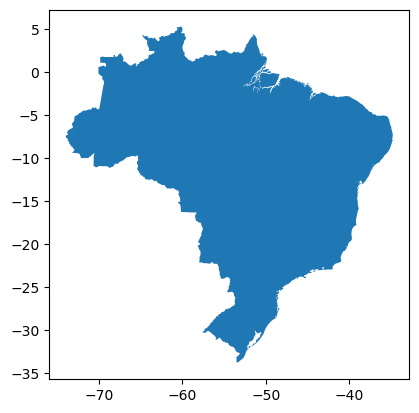

In [23]:
brasil.plot()

In [24]:
cities_clipped = gpd.clip(gdf=cities,
                          mask=brasil)
rivers_clipped = gpd.clip(gdf=rivers,
                               mask=brasil)

<AxesSubplot:>

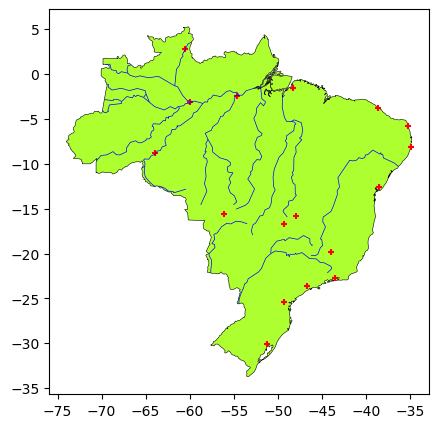

In [25]:
base = brasil.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_clipped.plot(marker='+', color='red', markersize=15,ax=base)
rivers_clipped.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [26]:
brazilCoord=[-14.235004, -51.92528]

In [27]:
m = cities.explore(location=brazilCoord,
                   zoom_start=4.5,
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") #optional
m = rivers.explore(m=m, color="blue",
                   name="rivers")#optional
# folium.LayerControl().add_to(m) #optional
m

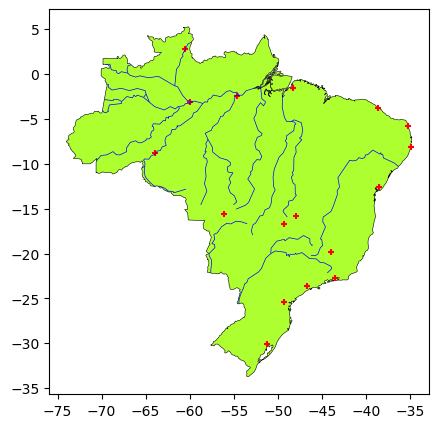

In [28]:
# save the map as image
import matplotlib.pyplot as plt

base = brasil.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
map2=cities_clipped.plot(marker='+', color='red', markersize=15,ax=base)
mapEnd=rivers_clipped.plot(edgecolor='blue', linewidth=0.5,ax=base)
plt.savefig(os.path.join("maps",'mapEnd.jpg'))

In [29]:
countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")

In [30]:
worldMaps='https://github.com/AnaLuciaChamorro/introgeodf/raw/main/maps/worldMaps.gpkg'

In [31]:
from  fiona import listlayers

listlayers(worldMaps)

['countries', 'cities', 'rivers']

In [33]:
countries=gpd.read_file(worldMaps,layer='countries')
cities=gpd.read_file(worldMaps,layer='cities')
rivers=gpd.read_file(worldMaps,layer='rivers')

<AxesSubplot:>

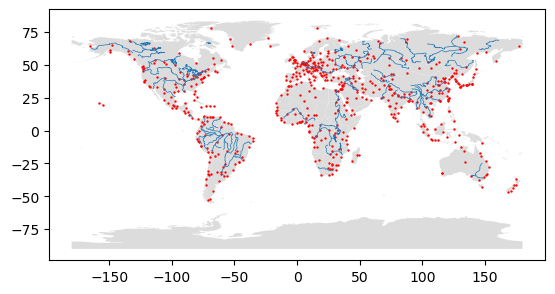

In [34]:
base = countries.plot(facecolor='gainsboro')
cities.plot(ax=base, markersize=0.5, color='red') 
rivers.plot(ax=base, linewidth=0.5)

In [1]:
import os
os.environ['USE_PYGEOS'] = '0' # only if you have pygeos

import geopandas as gpd
from  fiona import listlayers

#maps
worldMaps='https://github.com/CienciaDeDatosEspacial/code_and_data/raw/main/maps/worldMaps.gpkg'

#layers in maps
listlayers(worldMaps)

['countries', 'cities', 'rivers']

In [2]:
countries=gpd.read_file(worldMaps,layer='countries')
cities=gpd.read_file(worldMaps,layer='cities')
rivers=gpd.read_file(worldMaps,layer='rivers')

In [4]:
countries.crs.to_epsg()==cities.crs.to_epsg()==rivers.crs.to_epsg()

True

<AxesSubplot:>

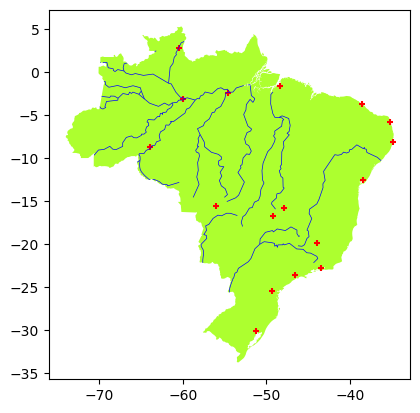

In [5]:
# just brazil
brazil=countries[countries.COUNTRY=='Brazil']

# clipping
brazil_cities= gpd.clip(gdf=cities,mask=brazil)
brazil_rivers = gpd.clip(gdf=rivers,mask=brazil)

# plotting
base = brazil.plot(facecolor="greenyellow")
brazil_rivers.plot(edgecolor='blue', linewidth=0.5,ax=base)
brazil_cities.plot(marker='+', color='red', markersize=15,ax=base)

In [6]:
# unit is in degrees:
brazil.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [7]:
# centroid
brazil.centroid

C:\Users\USUARIO}\AppData\Local\Temp\ipykernel_14944\515368123.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brazil.centroid


29    POINT (-53.09009 -10.77302)
dtype: geometry

In [8]:
brazil.to_crs(3587).crs.axis_info

ProjError: x, y, z, and time must be same size